In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()


In [ ]:
df_ice_cream = pd. read_csv('ice_cream.csv')

In [ ]:
df_ice_cream.rename(columns={'DATE': 'date', 'IPN31152N': 'production'},inplace=True)
df_ice_cream ['date'] = pd.to_datetime(df_ice_cream.date)
df_ice_cream.set_index ("date", inplace=True)
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream [start_date:]

In [ ]:
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


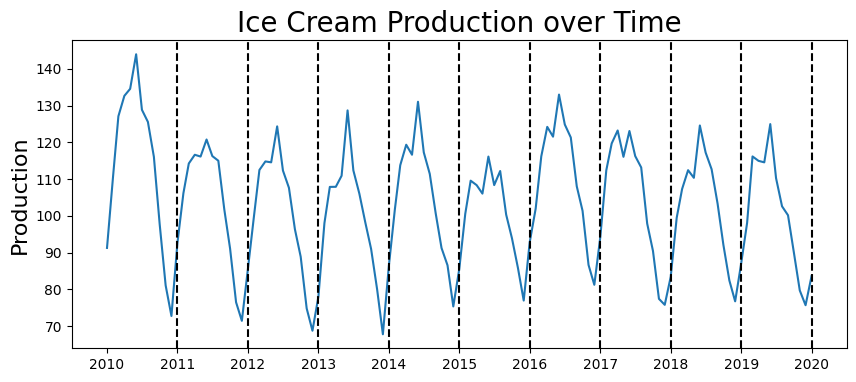

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range (2011, 2021):
  plt.axvline(pd.to_datetime (str(year)+'-01-01'), color= 'k', linestyle='--')

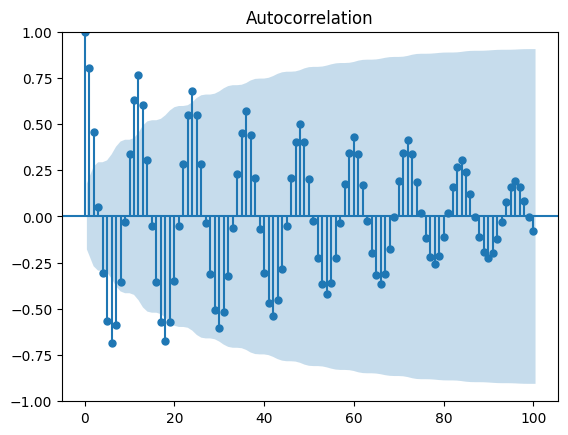

In [ ]:
acf_plot = plot_acf(df_ice_cream.production, lags=100)

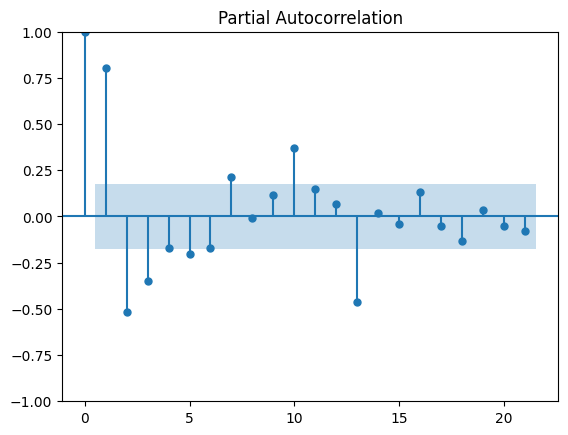

In [ ]:
pacf_plot = plot_pacf(df_ice_cream.production)

Stock Analysis

In [ ]:
import yfinance as yf
tickerSymbol = 'SPY'
tickerData = yf. Ticker (tickerSymbol)
tickerDf = tickerData.history (period='1d', start='2015-1-1', end='2020-1-1')

In [ ]:
tickerDf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2015-01-02 00:00:00-05:00,176.949179,177.377877,175.062900,176.134644,121465900,0.0,0.0,0.0
2015-01-05 00:00:00-05:00,175.054320,175.225796,172.636473,172.953705,169632600,0.0,0.0,0.0
2015-01-06 00:00:00-05:00,173.270892,173.811055,170.501511,171.324615,209151400,0.0,0.0,0.0
2015-01-07 00:00:00-05:00,172.696453,173.811069,172.233465,173.459534,125346700,0.0,0.0,0.0
2015-01-08 00:00:00-05:00,174.917152,176.760559,174.900014,176.537628,147217800,0.0,0.0,0.0


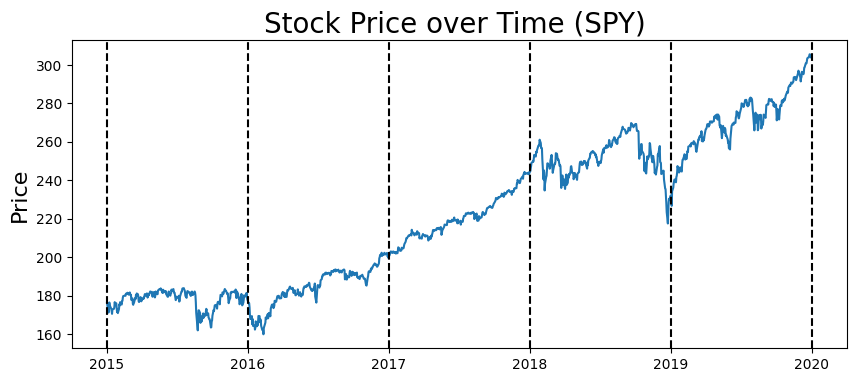

In [ ]:
tickerDf=tickerDf[['Close']]
plt.figure(figsize=(10,4))
plt.plot(tickerDf. Close)
plt.title('Stock Price over Time (%s) '%tickerSymbol, fontsize=20)
plt.ylabel ('Price', fontsize=16)
for year in range (2015, 2021):
  plt.axvline (pd.to_datetime (str(year)+' -01-01'), color='k', linestyle='--')

In [ ]:
first_diffs = tickerDf.Close.values[1:]-tickerDf.Close.values[:-1]
first_diffs = np. concatenate([first_diffs,[0]])
tickerDf[ 'FirstDifference'] = first_diffs

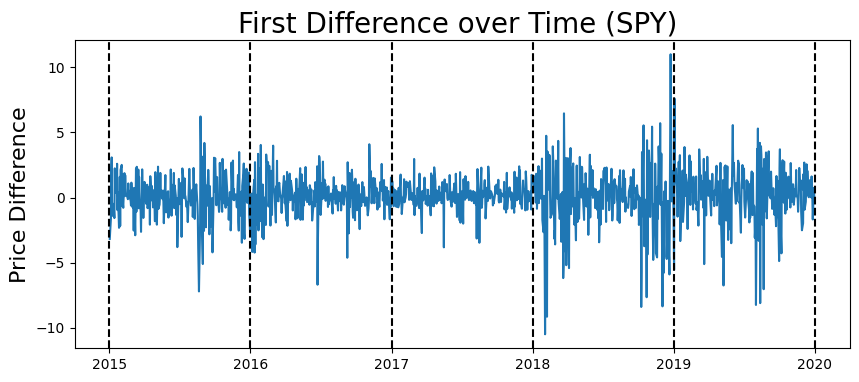

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time (%s) '%tickerSymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015, 2021):
  plt.axvline(pd.to_datetime (str (year)+'-01-01'), color= 'k', linestyle='--')

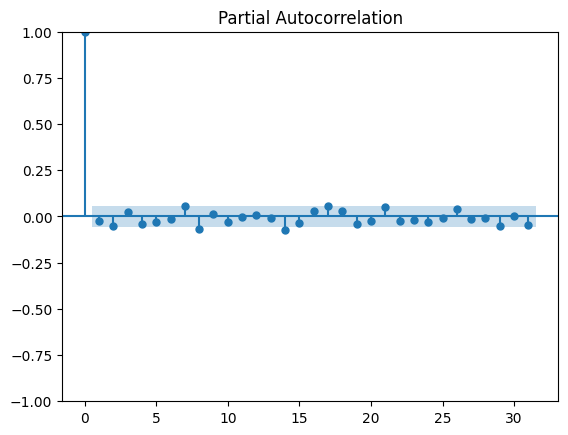

In [ ]:
pacf_plot = plot_pacf(tickerDf.FirstDifference)

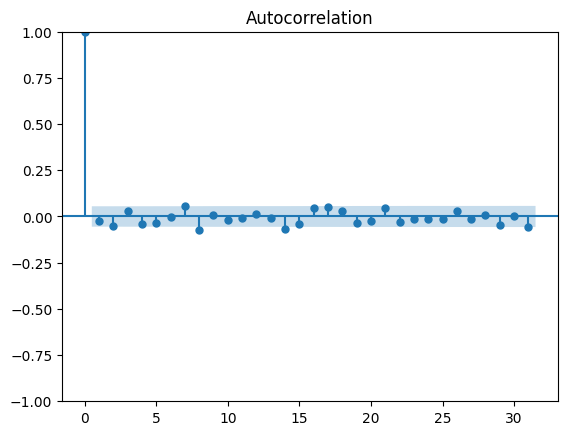

In [ ]:
pacf_plot = plot_acf(tickerDf.FirstDifference)